In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files

# Open file picker
uploaded = files.upload()

# Check uploaded file names
for name, data in uploaded.items():
    print(f"netflix_titles.csv: {name}, size: {len(data)} bytes")

Saving netflix_titles.csv to netflix_titles.csv
netflix_titles.csv: netflix_titles.csv, size: 3338429 bytes


In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv", encoding="latin-1")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:

# Check the column names
print(df.columns)

# Drop rows where 'listed_in' is NaN
df_clean = df.dropna(subset=['listed_in'])

# Split genres, explode into rows, strip spaces, count top 10
top_genres = (
    df_clean['listed_in']
    .str.split(',')     # split multiple genres
    .explode()          # make each genre a separate row
    .str.strip()        # remove extra spaces
    .value_counts()     # count occurrences
    .head(10)           # top 10 genres
)

print(top_genres)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [8]:
df.info()  #check column types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [9]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [10]:
df.describe()  #summary stats for numeric columns

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [11]:
df.columns # list all column names

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.isnull().sum()   #count missing values per column

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [14]:
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['date_added'].fillna("Unknown", inplace=True)
df['rating'].fillna("Not Rated", inplace=True)
df['duration'].fillna("Unknown", inplace=True)

/tmp/ipython-input-2771357926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace=True)
/tmp/ipython-input-2771357926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [15]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [16]:
# Basic info
print("Total Movies/Shows:", df.shape[0])
print("Unique Countries:", df['country'].nunique())

Total Movies/Shows: 8809
Unique Countries: 749


In [17]:
df.loc[(df['type']=='Movie') & (df['country']=='India')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21-Sep-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,5-Sep-21,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,2-Sep-21,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialistâs dangerous obsessio...
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2-Sep-21,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2-Sep-21,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,1-May-17,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,1-Jan-18,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,31-Dec-19,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,15-Feb-18,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [18]:
# Keep only rows with a director listed
df = df.dropna(subset=['director'])

In [19]:
df['director_list'] = df['director'].str.split(', ')

In [20]:
df['listed_in']= df['listed_in'].str.split(',')

In [21]:
df['rating'].value_counts()

,count
rating,
TV-MA,3208
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [22]:
df.groupby('release_year')['title'].count()

,title
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2018,1147
2019,1030
2020,953


#Perform analysis

# Key Performance Indicators (KPIs)

In [23]:
df['title'].nunique()

8806

In [24]:
df['type'].value_counts()

,count
type,
Movie,6132
TV Show,2677


In [25]:
df['country'].value_counts().head(10)

,count
country,
United States,2819
India,972
Unknown,831
United Kingdom,419
Japan,245
South Korea,200
Canada,181
Spain,145
France,124


In [26]:
df['rating'].value_counts()

,count
rating,
TV-MA,3208
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [27]:
df['listed_in'].explode().value_counts().head(10)

,count
listed_in,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
International TV Shows,774
Independent Movies,736
TV Dramas,696


In [28]:
df_exploded = df.explode('director_list')
top_directors = df_exploded['director_list'].value_counts().head(10)
print(top_directors)
df_exploded['director_list'] = df_exploded['director_list'].str.title().str.strip()

director_list
Unknown                2634
Rajiv Chilaka            22
Jan Suter                21
RaÃºl Campos             19
Marcus Raboy             16
Suhas Kadav              16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Jay Chapman              12
Name: count, dtype: int64


#Trends Analysis

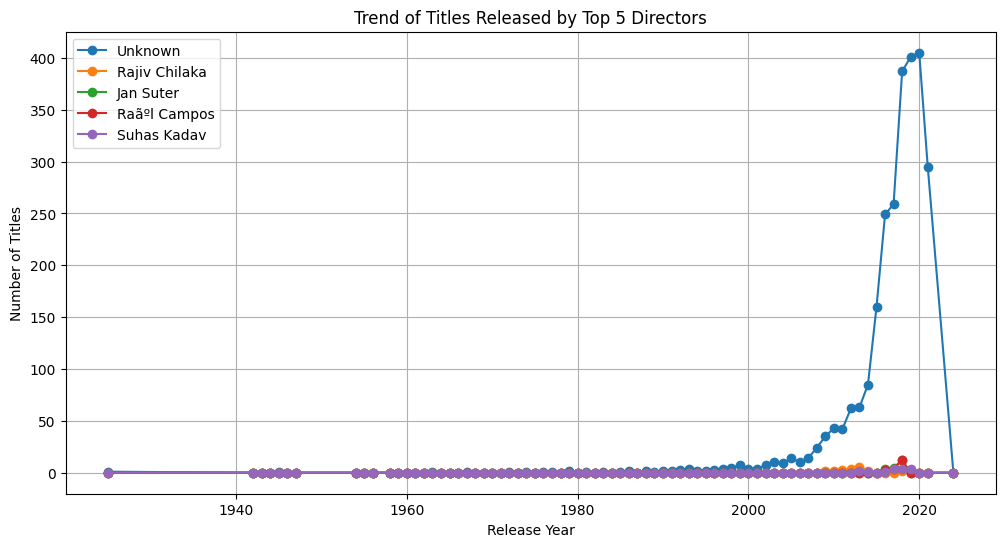

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explode the director_list column to handle multiple directors per title
df_exploded = df.explode('director_list')

# Apply consistent capitalization and strip whitespace
df_exploded['director_list'] = df_exploded['director_list'].str.title().str.strip()

# Calculate number of titles per director per year
director_trend = df_exploded.groupby(['release_year', 'director_list'])['title'].count().unstack().fillna(0)

# Get the top 5 directors by total number of titles
top_directors_list = df_exploded['director_list'].value_counts().head(5).index

# Filter the director_trend DataFrame to include only the top 5 directors
director_trend_top5 = director_trend[top_directors_list]

# Plot with plt
plt.figure(figsize=(12,6))
for director in director_trend_top5.columns:
    plt.plot(director_trend_top5.index, director_trend_top5[director], marker='o', label=director)

plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Trend of Titles Released by Top 5 Directors")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-2662310060.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


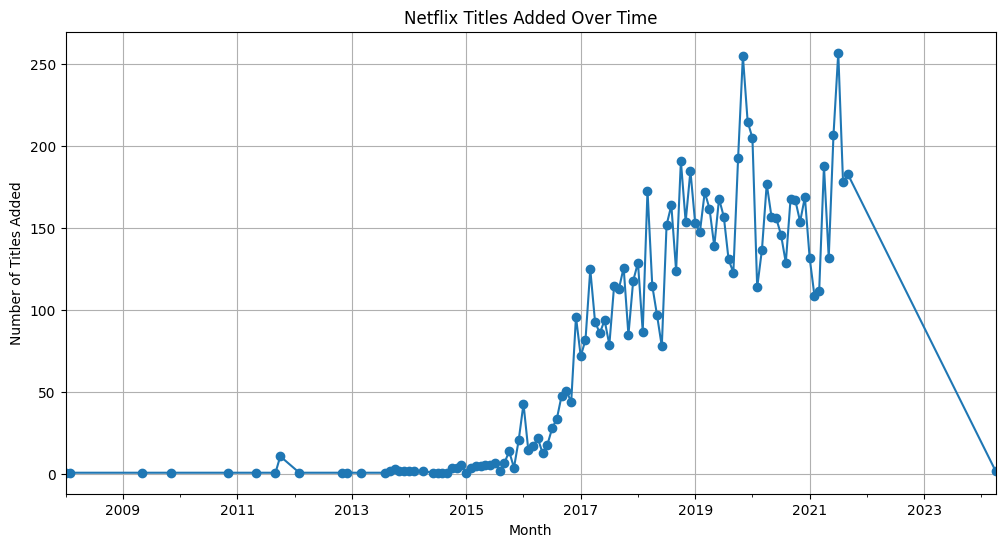

In [30]:
#release year trend

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
titles_per_month = df.groupby(df['date_added'].dt.to_period('M'))['title'].count()

titles_per_month.plot(kind='line', marker='o', figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.title('Netflix Titles Added Over Time')
plt.grid(True)
plt.show()

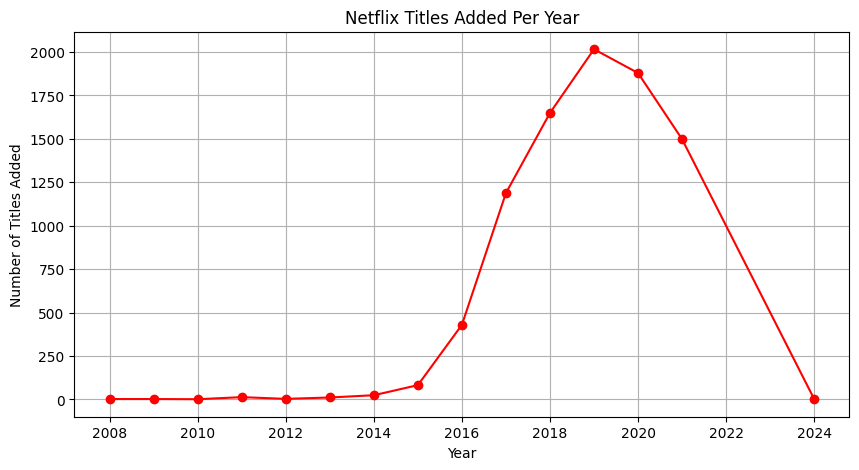

In [31]:
#data added trend

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
titles_per_year = df['date_added'].dt.year.value_counts().sort_index() # Calculate titles_per_year

titles_per_year.plot(kind='line', marker='o', figsize=(10,5), color='red')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.title('Netflix Titles Added Per Year')
plt.grid(True)
plt.show()

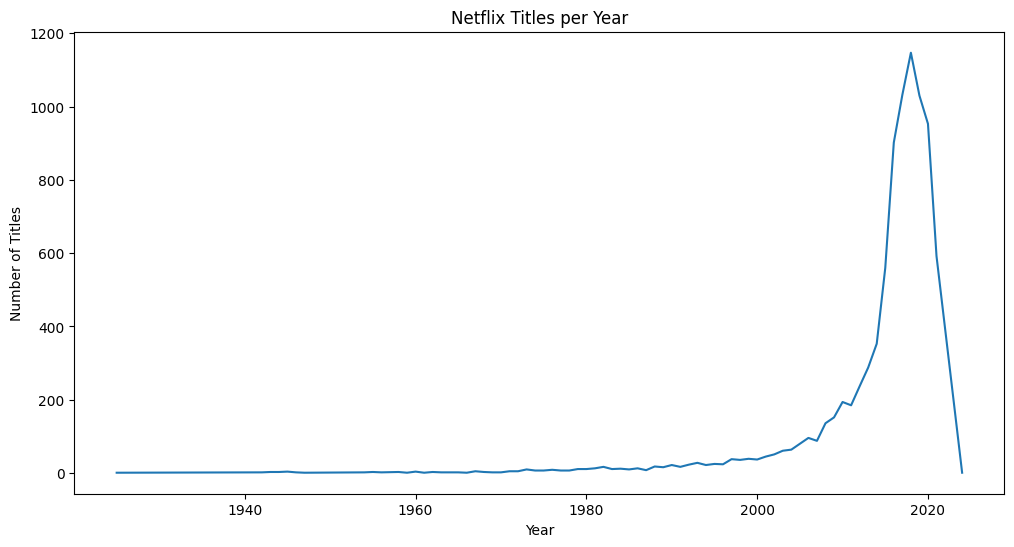

In [32]:
titles_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values)
plt.title("Netflix Titles per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

/tmp/ipython-input-737737644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


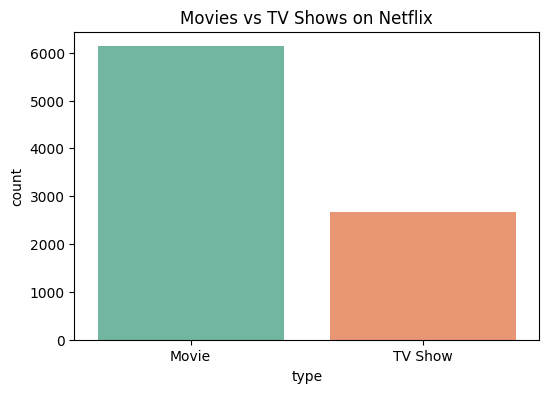

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

/tmp/ipython-input-1754874.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette="coolwarm")


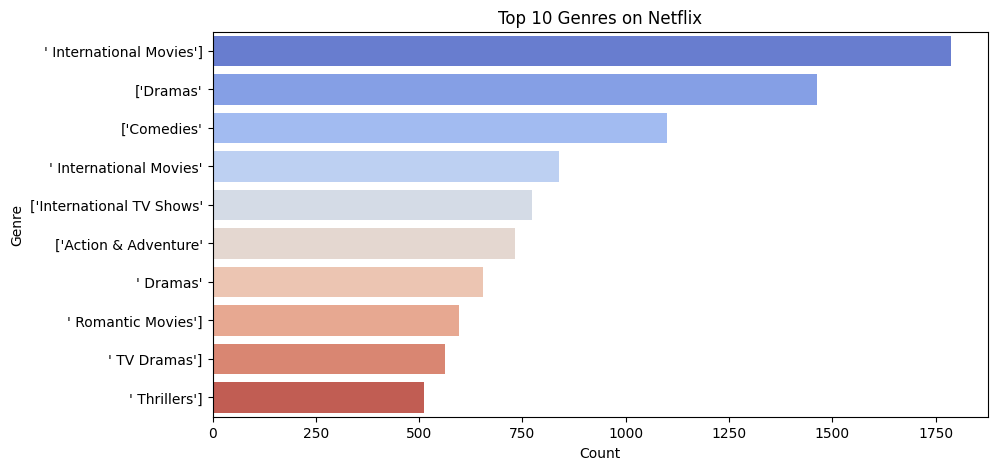

In [34]:
from collections import Counter

# Ensure 'listed_in' is treated as strings and handle potential NaNs
genre_list = df['listed_in'].astype(str).str.split(', ').dropna()

# Flatten the list of lists, handling potential empty sublists
all_genres = [g.strip() for sublist in genre_list if isinstance(sublist, list) for g in sublist if g.strip()]

# Get the most common genres
genre_counts = Counter(all_genres).most_common(10)

# Check if genre_counts is not empty before unpacking
if genre_counts:
    genres, counts = zip(*genre_counts)

    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(genres), palette="coolwarm")
    plt.title("Top 10 Genres on Netflix")
    plt.xlabel("Count")
    plt.ylabel("Genre")
    plt.show()
else:
    print("No valid genres found to display.")

/tmp/ipython-input-2977916908.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


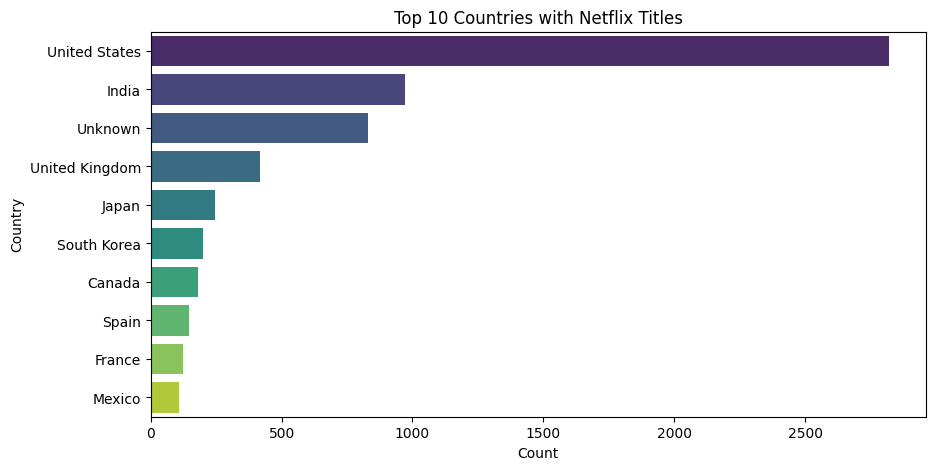

In [35]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Netflix Titles")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

In [36]:

# Save cleaned dataset
df.to_csv("cleaned_netflix.csv", index=False)
print("Cleaned dataset saved as 'cleaned_netflix.csv'")

Cleaned dataset saved as 'cleaned_netflix.csv'


In [37]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.8 MB/s eta 0:00:00


In [93]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Load cleaned data
df = pd.read_csv("cleaned_netflix.csv")

st.title("Netflix Data Analysis")
st.subheader("Data Preview")
st.write(df.head())

# Sidebar navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Overview", "Trends", "Insights"])

# Filters (applied to all pages)
type_filter = st.sidebar.multiselect("Select Type", df['type'].unique(), default=df['type'].unique())
year_min, year_max = int(df['release_year'].min()), int(df['release_year'].max())
year_filter = st.sidebar.slider("Release Year Range", year_min, year_max, (year_min, year_max))
country_filter = st.sidebar.multiselect("Select Countries", df['country'].dropna().unique(), default=[])

# Apply filters
filtered_df = df[df['type'].isin(type_filter)]
filtered_df = filtered_df[(filtered_df['release_year'] >= year_filter[0]) & (filtered_df['release_year'] <= year_filter[1])]
if country_filter:
    filtered_df = filtered_df[filtered_df['country'].isin(country_filter)]

# ---------------- OVERVIEW PAGE ----------------
if page == "Overview":
    st.title("🎬 Netflix Dashboard")
    st.image("https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg", width=200)  # Netflix logo
    st.write("**By: V.MADHUVANTHI**")

    st.subheader("General Overview")
    st.write(f"Total Titles: {df.shape[0]}")
    st.write("Type Distribution:")
    st.write(df['type'].value_counts())
    st.write(f"Release Year: {df['release_year'].min()} - {df['release_year'].max()}")
    st.write(f"Unique Countries: {df['country'].nunique()}")

    col1, col2, col3, col4, col5 = st.columns(5)
    col1.metric("Total Titles", df.shape[0])
    col2.metric("Movies", df[df['type'] == "Movie"].shape[0])
    col3.metric("TV Shows", df[df['type'] == "TV Show"].shape[0])
    col4.metric("Countries", df['country'].nunique())
    col5.metric("Directors", df['director'].nunique())

# ---------------- TRENDS PAGE ----------------
elif page == "Trends":
    st.title("📈 Trends")

    if not filtered_df.empty:

        # Movies vs TV Shows pie chart (3D-style donut)
        type_counts = filtered_df['type'].value_counts().reset_index()
        type_counts.columns = ['Type', 'Count']

        fig1 = px.pie(
            type_counts,
            names='Type',
            values='Count',
            title='Movies vs TV Shows',
            hole=0.3,
            color='Type',
            color_discrete_map={'Movie':'#E50914', 'TV Show':'#FF5733'}
        )
        fig1.update_traces(textposition='inside', textinfo='percent+label')
        st.plotly_chart(fig1, use_container_width=True)

        # Release year distribution
        year_counts = filtered_df.groupby("release_year").size().reset_index(name="Count")
        fig2 = px.bar(
            year_counts,
            x="release_year",
            y="Count",
            title="Content Released Over Years",
            color="Count",
            color_continuous_scale=["#E50914", "#FF5733"]
        )
        st.plotly_chart(fig2, use_container_width=True)

        # Content rating distribution
        if "rating" in filtered_df.columns:
            fig3 = px.histogram(
                filtered_df,
                x="rating",
                title="Content Rating Distribution",
                color_discrete_sequence=["#E50914"]
            )
            st.plotly_chart(fig3, use_container_width=True)

    else:
        st.warning("No data available. Try a different search.")

# ---------------- INSIGHTS PAGE ----------------
elif page == "Insights":
    st.title("🔍 Insights")

    if not filtered_df.empty:
        # Top 10 Genres
        st.subheader("Top 10 Genres")
        genre_counts = filtered_df['listed_in'].str.split(', ').explode().value_counts().head(10)
        genre_df = genre_counts.reset_index()
        genre_df.columns = ["Genre", "Count"]

        fig_genre = px.bar(
            genre_df,
            x="Genre",
            y="Count",
            title="Top 10 Genres",
            color_discrete_sequence=["#E50914"],
            text="Count"
        )
        fig_genre.update_traces(marker_line_width=1.5, marker_line_color="black")
        st.plotly_chart(fig_genre, use_container_width=True)

        # Top 10 Countries
        st.subheader("Top 10 Countries")
        country_counts = filtered_df['country'].value_counts().head(10)
        country_df = country_counts.reset_index()
        country_df.columns = ["Country", "Count"]

        fig_country = px.bar(
            country_df,
            x="Country",
            y="Count",
            title="Top 10 Countries",
            color_discrete_sequence=["#E50914"],
            text="Count"
        )
        fig_country.update_traces(marker_line_width=1.5, marker_line_color="black")
        st.plotly_chart(fig_country, use_container_width=True)

        # Search a Title
        st.subheader("🎥 Search a Title")
        search = st.text_input("Enter a movie/show title")

        if search:
            results = filtered_df[filtered_df['title'].str.contains(search, case=False, na=False)]
            if not results.empty:
                st.dataframe(results[['title','type','director','cast','country','release_year','rating','listed_in','description']])
            else:
                st.warning("No results found.")

    else:
        st.warning("No data available for insights.")

Overwriting app.py


In [94]:
!pip install pyngrok

In [95]:
!ngrok config add-authtoken "33MCHXQ9Dr2KSgLxliMQmlv0DPK_wLpxFJDorXnfeDRFj4zb"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [96]:
!pip install streamlit pyngrok -q

from pyngrok import ngrok

# Kill any existing tunnels
ngrok.kill()

# Start streamlit app
import threading

def run_app():
    !streamlit run app.py --server.port 8501 --server.headless true

threading.Thread(target=run_app).start()

# Start ngrok tunnel
public_url = ngrok.connect(8501)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://bradley-sapient-veronica.ngrok-free.dev" -> "http://localhost:8501"
